# Linear Regression

In [2]:
import torch
import numpy as np
import torch.nn as nn
from sklearn import datasets
import matplotlib.pyplot as plt

In [5]:
#Prepare dataset
X_numpy,y_numpy = datasets.make_regression(n_samples=100,n_features=1,noise=20,random_state=1)

In [8]:
#To change datatype-astype is used numpy
X=torch.from_numpy(X_numpy.astype(np.float32))
y=torch.from_numpy(y_numpy.astype(np.float32))

In [9]:
#Reshaping y as y has only 1 column 
y=y.view(y.shape[0],1)

In [10]:
n_samples, n_features = X.shape

In [11]:
input_size=n_features
output_size=1
model=nn.Linear(input_size,output_size)

In [12]:
#loss and optimizer
learning_rate=0.01
criterion= nn.MSELoss()
optimizer= torch.optim.SGD(model.parameters(),lr=learning_rate)

In [14]:
#Training loop
num_epochs=100
for epoch in range(num_epochs):
    #forward pass and loss
    y_predicted=model(X)
    loss=criterion(y_predicted,y)
    
    #backward pass
    loss.backward()
    
    #update
    optimizer.step()
    
    optimizer.zero_grad()
    
    if(epoch+1)%10==0:
        print(f'epoch: {epoch+1},loss={loss.item():.4f}')

epoch: 10,loss=4472.4644
epoch: 20,loss=3334.6609
epoch: 30,loss=2511.5325
epoch: 40,loss=1915.4083
epoch: 50,loss=1483.2538
epoch: 60,loss=1169.6772
epoch: 70,loss=941.9484
epoch: 80,loss=776.4347
epoch: 90,loss=656.0518
epoch: 100,loss=568.4359


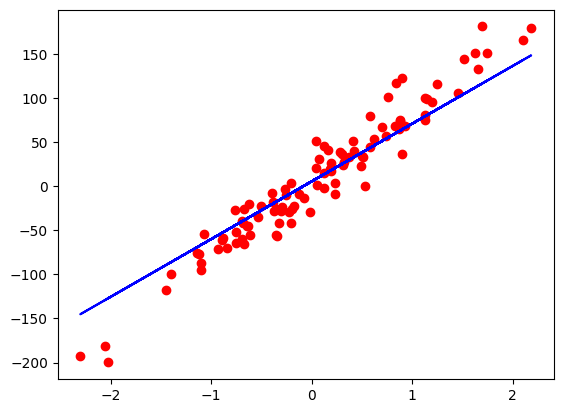

In [15]:
#plot 
predicted=model(X).detach().numpy()
plt.plot(X_numpy,y_numpy,'ro')
plt.plot(X_numpy,predicted,'b')
plt.show()